In [16]:
import pandas as pd
import numpy as np
from read_smart_data import read_SMARD_data, split_dataset, standardize_data, create_data_windows

# Problem 1

In [17]:
# Load the data
csv_path = 'SMARD.csv'  # Replace with your file path
smard_data = read_SMARD_data(csv_path)
 
# Example usage of the functions:
train_start = pd.to_datetime('2020-01-01')
train_end = pd.to_datetime('2020-02-01')
validation_start = pd.to_datetime('2020-07-01')
validation_end = pd.to_datetime('2020-08-01')
train_set, validation_set = split_dataset(smard_data, train_start, train_end, validation_start, validation_end)
 
# Standarize data
train_set_standardized, validation_set_standardized = standardize_data(train_set, validation_set)
 
input_timesteps = 3  # for instance
output_timesteps = 1  # for instance
input_data, label_data = create_data_windows(train_set_standardized, input_timesteps, output_timesteps)

# Problem 2

In [18]:
# Load the data
csv_path = 'SMARD.csv'  # Replace with your file path
smard_data = read_SMARD_data(csv_path, remove_bad_columns=True)
 
# Example usage of the functions:
train_start = pd.to_datetime('2020-01-01')
train_end = pd.to_datetime('2020-02-01')
validation_start = pd.to_datetime('2020-07-01')
validation_end = pd.to_datetime('2020-08-01')
train_set, validation_set = split_dataset(smard_data, train_start, train_end, validation_start, validation_end)
 
# Standarize data
train_set_standardized, validation_set_standardized = standardize_data(train_set, validation_set)
 
input_timesteps = 20  # for instance
output_timesteps = 10  # for instance
input_data, label_data = create_data_windows(train_set_standardized, input_timesteps, output_timesteps)
input_data_val, label_data_val = create_data_windows(validation_set_standardized, input_timesteps, output_timesteps)

print("Training input shape:", label_data.shape)
print("Validation input shape:", label_data_val.shape)

Training input shape: (2948, 10, 1)
Validation input shape: (2948, 10, 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
 
# Define the RNN model
model = Sequential()
 
# Example architecture: GRU layer with 128 units
# You can also try the other suggested architectures by adding or modifying layers
model.add(GRU(128, input_shape=(input_timesteps, 1), return_sequences=False))
 
# Output layer with linear activation and units matching the number of output timesteps
model.add(Dense(output_timesteps, activation='linear'))
 
# Compile the model
model.compile(optimizer='adam', loss='mse')
 
# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 128)               50304     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 51,594
Trainable params: 51,594
Non-trainable params: 0
_________________________________________________________________


2024-01-17 15:24:10.267472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-17 15:24:10.268301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-17 15:24:10.268893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [20]:
# Train the model
history = model.fit(input_data, label_data, validation_data=(input_data_val, label_data_val), epochs=40, batch_size=64)

Epoch 1/40


2024-01-17 15:24:10.419830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-17 15:24:10.420731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-17 15:24:10.421403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

45/47 [===========================>..] - ETA: 0s - loss: 0.4030

2024-01-17 15:24:12.310056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-17 15:24:12.310913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-17 15:24:12.311528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

47/47 [==============================] - 2s 29ms/step - loss: 0.3969 - val_loss: 0.1833
Epoch 2/40
47/47 [==============================] - 1s 32ms/step - loss: 0.1384 - val_loss: 0.1124
Epoch 3/40
47/47 [==============================] - 1s 25ms/step - loss: 0.1083 - val_loss: 0.1119
Epoch 4/40
47/47 [==============================] - 1s 30ms/step - loss: 0.0929 - val_loss: 0.1160
Epoch 5/40
47/47 [==============================] - 1s 26ms/step - loss: 0.0814 - val_loss: 0.0778
Epoch 6/40
47/47 [==============================] - 1s 24ms/step - loss: 0.0786 - val_loss: 0.0999
Epoch 7/40
47/47 [==============================] - 2s 34ms/step - loss: 0.0722 - val_loss: 0.1023
Epoch 8/40
47/47 [==============================] - 1s 27ms/step - loss: 0.0691 - val_loss: 0.0774
Epoch 9/40
47/47 [==============================] - 1s 25ms/step - loss: 0.0682 - val_loss: 0.1049
Epoch 10/40
47/47 [==============================] - 1s 28ms/step - loss: 0.0650 - val_loss: 0.0821
Epoch 11/40
47/47 [=

 9/93 [=>............................] - ETA: 0s 

2024-01-17 15:25:00.331323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-17 15:25:00.332273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-17 15:25:00.332881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

93/93 [==============================] - 1s 6ms/step


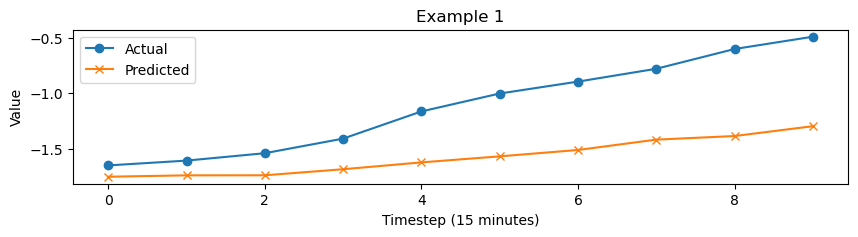

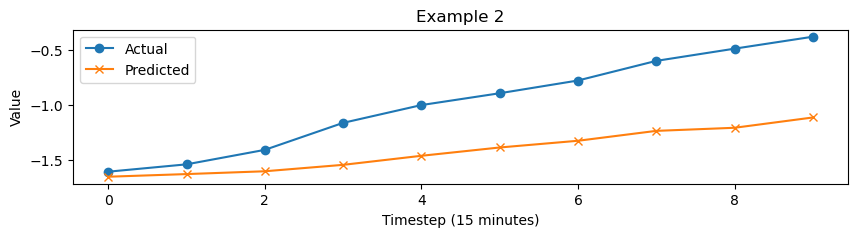

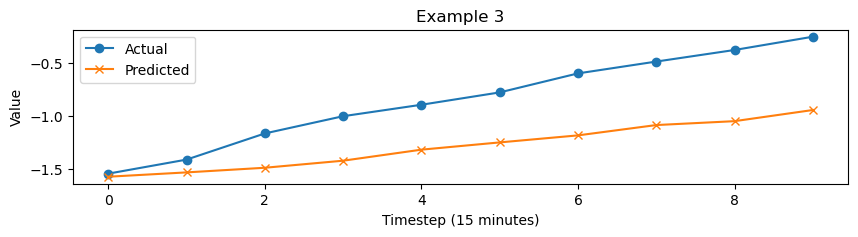

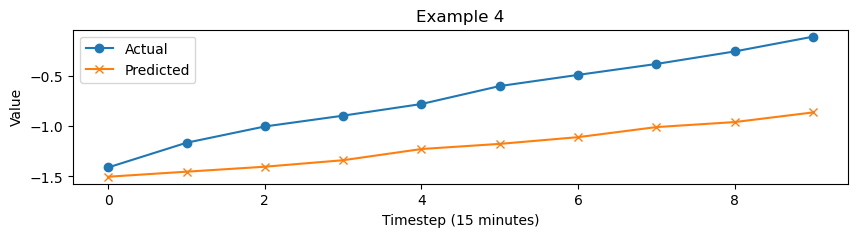

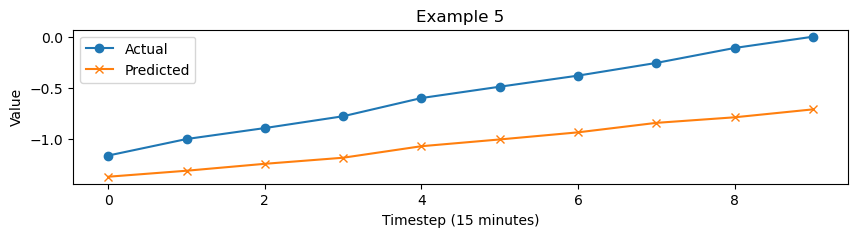

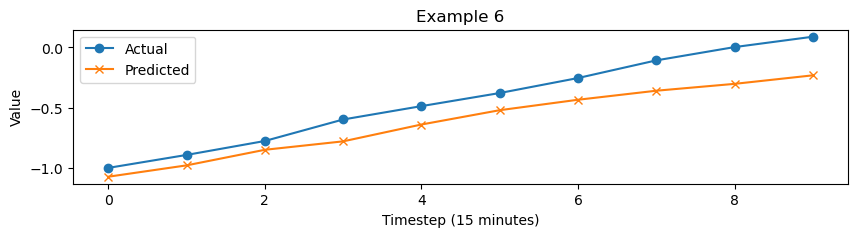

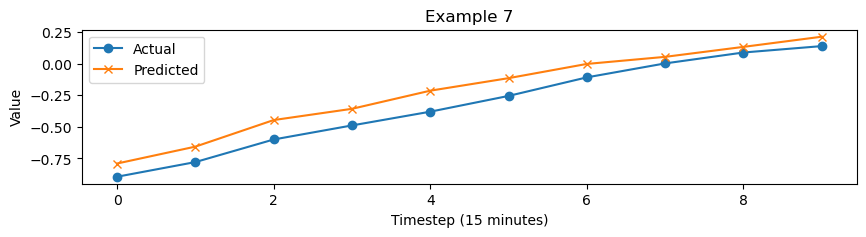

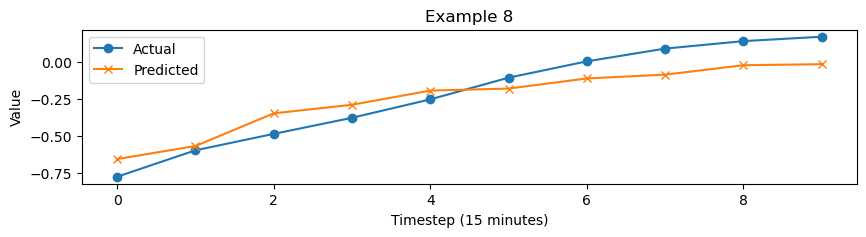

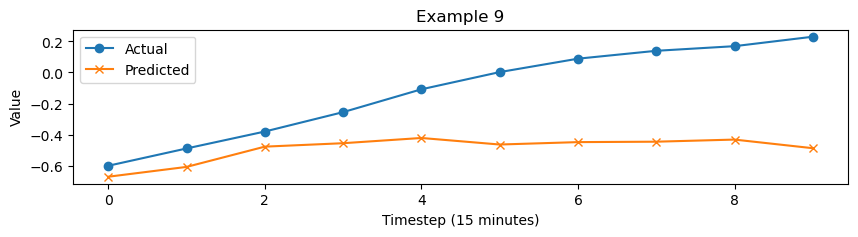

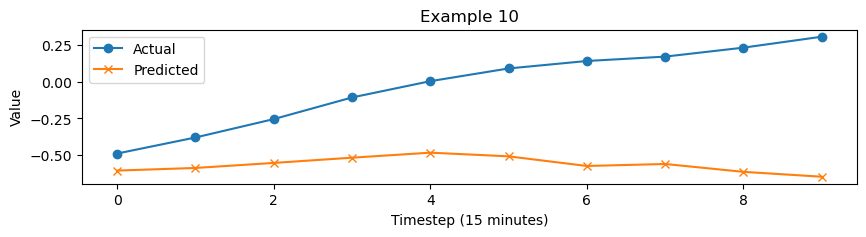

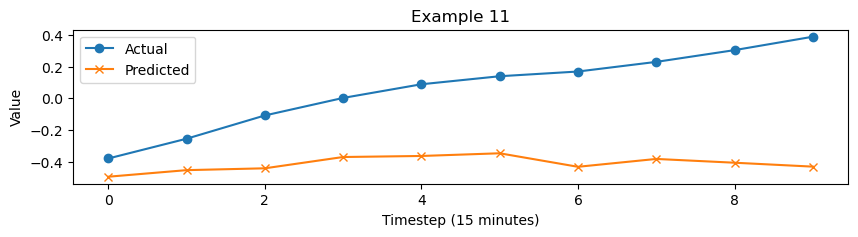

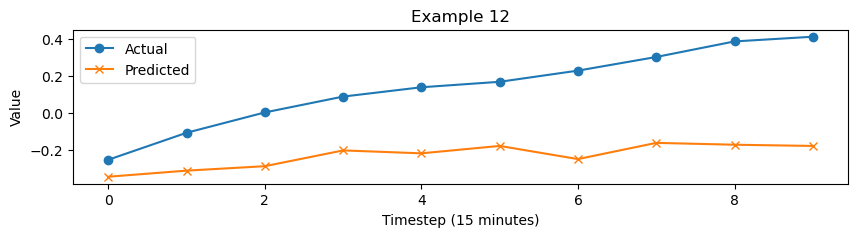

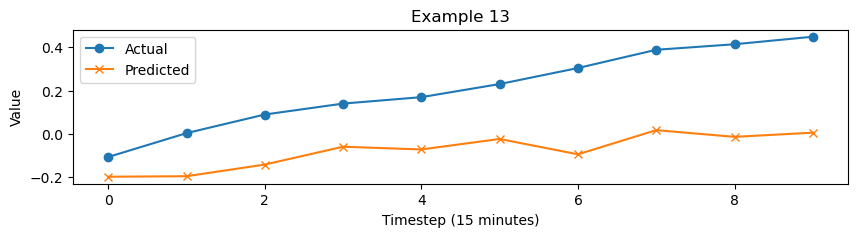

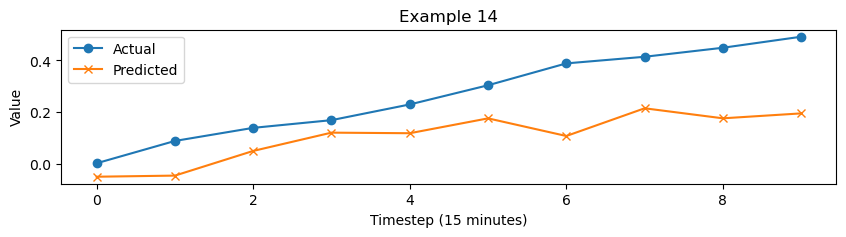

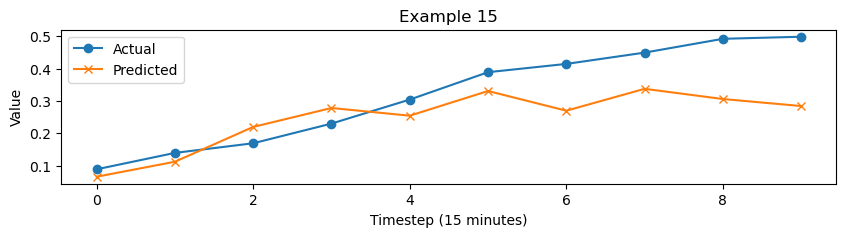

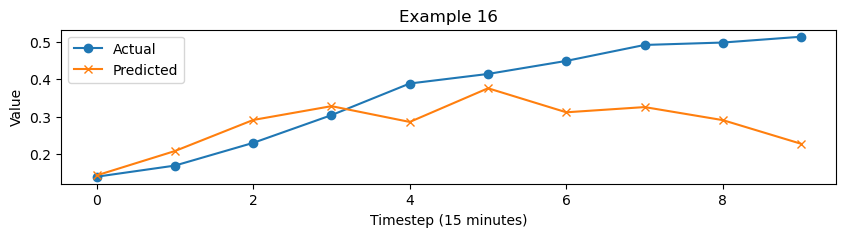

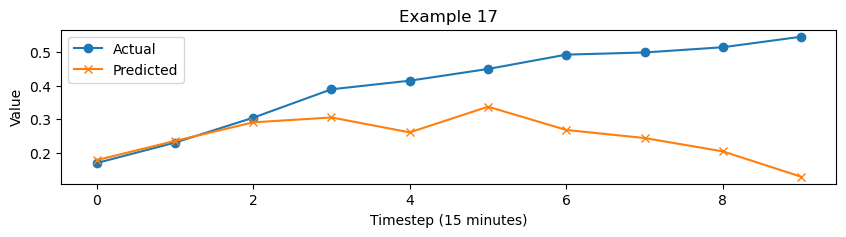

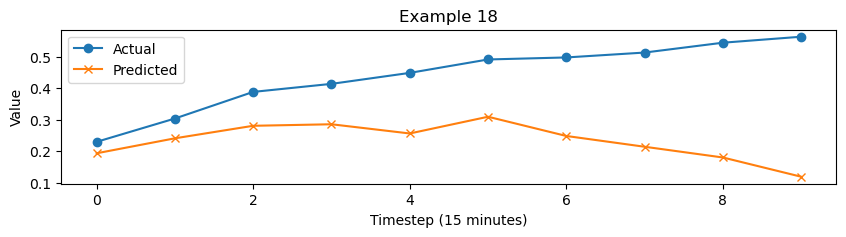

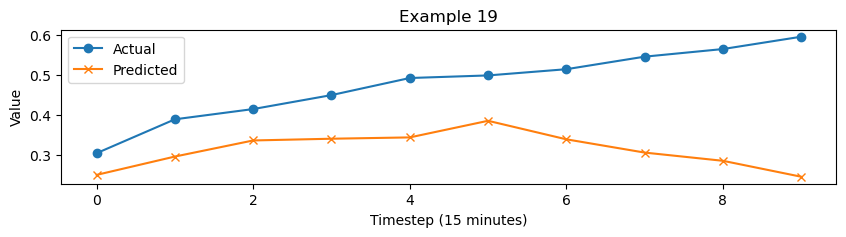

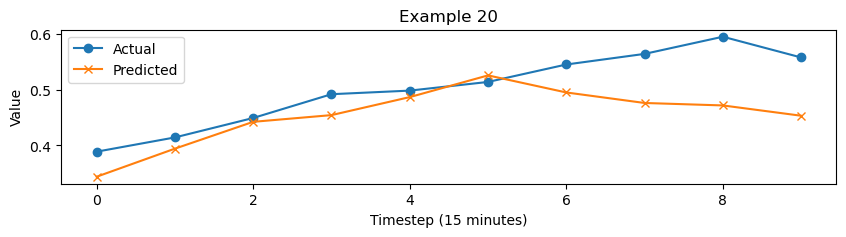

In [21]:
import matplotlib.pyplot as plt
 
# Predict on the validation set
validation_predictions = model.predict(input_data_val)
 
# Plotting the first few examples
n_examples = 20
for i in range(n_examples):
    plt.figure(figsize=(10, 2))
    
    # Plot actual values
    plt.plot(range(output_timesteps), label_data_val[i], marker='o', label='Actual')
    
    # Plot predicted values
    plt.plot(range(output_timesteps), validation_predictions[i], marker='x', label='Predicted')
    
    plt.title(f'Example {i + 1}')
    plt.xlabel('Timestep (15 minutes)')
    plt.ylabel('Value')
    plt.legend()
    plt.show()